# An√°lise de Integra√ß√£o ao Sistema Nacional de Tr√¢nsito (SNT)

Este notebook apresenta uma an√°lise detalhada dos fatores que influenciam a integra√ß√£o dos munic√≠pios ao Sistema Nacional de Tr√¢nsito (SNT).

## 1. Importa√ß√£o das Bibliotecas e Carregamento dos Dados

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

# Carregar os dados
df = pd.read_excel('/home/fause/ML-Transportes/Dados/analiseestatistica_indicadores2.xlsx') 
print("Dimens√µes do dataset:", df.shape)
df.head()


Dimens√µes do dataset: (5570, 27)


UF    Estado  codigo_ibge Integrado ao SNT  Sinistros  Z-score Sinistros   
0  RO  Rond√¥nia      1100015              N√£o       1102          -0.006384  \
1  RO  Rond√¥nia      1100023              Sim       5622           0.453483   
2  RO  Rond√¥nia      1100031              N√£o        185          -0.099680   
3  RO  Rond√¥nia      1100049              Sim       5957           0.487566   
4  RO  Rond√¥nia      1100056              N√£o        732          -0.044028   

   Popula√ß√£o  Z-score popula√ß√£o  Soma da Arrecada√ß√£o 2018-2023   
0      21494          -0.072467                   3.291565e+09  \
1      96833           0.292338                   1.718637e+10   
2       5351          -0.150634                   1.672614e+09   
3      86887           0.244178                   1.279220e+10   
4      15890          -0.099602                   3.614702e+09   

   Z-score Arrecada√ß√£o  ...   IDHM  Z-score IDHM   
0            -0.076026  ...  0.641     -0.217690  \
1             0.164665  ...  0.702      0.567787   
2            -0.104070  ...  0.650     -0.101800   
3             0.088548  ...  0.718      0.773814   
4            -0.070429  ...  0.692      0.439020   

   Taxa de Admiss√£o em Empregos       300  Taxa de √ìbitos/100 mil habitantes   
0                      0.509897 -0.094854                         162.836140  \
1                      0.505000 -0.172360                         171.429162   
2                      0.515403 -0.007693                         224.257148   
3                      0.511808 -0.064596                         159.977902   
4                      0.500262 -0.247362                         195.091252   

   Z-score Tx √≥bito/100 mil hab  % de √ìbitos/Sinistros   
0                      1.001660               3.176044  \
1                      1.122970               2.952686   
2                      1.868761               6.486486   
3                      0.961309               2.333389   
4                      1.457016               4.234973   

   Z-score √ìbitos/Sinistros  area_km2  km_rodovias_federais  
0                 -0.600753  7067.127              0.000000  
1                 -0.607705  4426.143             77.806543  
2                 -0.497720  1314.352              0.000000  
3                 -0.626980  3793.000             51.712641  
4                 -0.567796  2783.297             29.154767  

[5 rows x 27 columns]

## 2. An√°lise Explorat√≥ria dos Dados

In [40]:
# Informa√ß√µes gerais do dataframe
print("Informa√ß√µes do DataFrame:")
print(df.info())

print("\nEstat√≠sticas descritivas:")
print(df.describe())

print("\nValores nulos por coluna:")
print(df.isnull().sum())

Informa√ß√µes do DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5570 entries, 0 to 5569
Data columns (total 27 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   UF                                 5570 non-null   object 
 1   Estado                             5570 non-null   object 
 2   codigo_ibge                        5570 non-null   int64  
 3   Integrado ao SNT                   5570 non-null   object 
 4   Sinistros                          5570 non-null   int64  
 5   Z-score Sinistros                  5570 non-null   float64
 6   Popula√ß√£o                          5570 non-null   int64  
 7   Z-score popula√ß√£o                  5570 non-null   float64
 8   Soma da Arrecada√ß√£o 2018-2023      5570 non-null   float64
 9   Z-score Arrecada√ß√£o                5570 non-null   float64
 10  PIB                                5570 non-null   float64
 11  Z-score PIB         

In [55]:
import pandas as pd

# Fun√ß√£o de classifica√ß√£o
def classificar_pib_per_capita(valor):
    if valor >= 100_000:
        return "Alt√≠ssimo desenvolvimento"
    elif valor >= 60_000:
        return "Alto desenvolvimento"
    elif valor >= 30_000:
        return "Desenvolvimento intermedi√°rio"
    elif valor >= 15_000:
        return "Baixo desenvolvimento"
    else:
        return "Muito baixo desenvolvimento"

# Supondo que seu DataFrame se chame df e tenha a coluna 'pib_per_capita'
df['classe_pib_per_capita'] = df['PIB per capita'].apply(classificar_pib_per_capita)

# Contagem de munic√≠pios por classe
contagem_por_classe = df['classe_pib_per_capita'].value_counts().sort_index()

# Exibir o resultado
print("Quantidade de munic√≠pios por classifica√ß√£o de PIB per capita:\n")
print(contagem_por_classe)


Quantidade de munic√≠pios por classifica√ß√£o de PIB per capita:

classe_pib_per_capita
Alto desenvolvimento               31
Alt√≠ssimo desenvolvimento          16
Baixo desenvolvimento            1080
Desenvolvimento intermedi√°rio     185
Muito baixo desenvolvimento      4166
Name: count, dtype: int64


## 3. Tratamento dos Dados

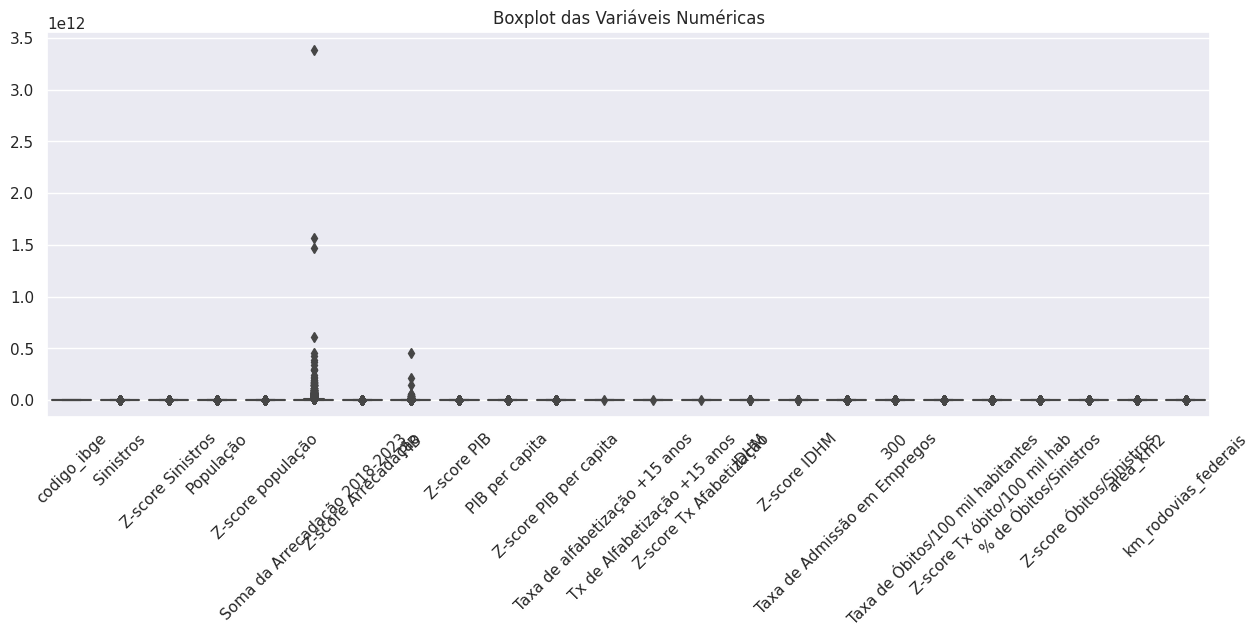

In [41]:
# Tratamento de valores nulos
#df['km_rodovias_federais'] = df['km_rodovias_federais'].fillna(0)
#df['area_km2'] = df['area_km2'].fillna(df['area_km2'].median())
df.dropna(inplace=True)


# Visualiza√ß√£o de outliers
plt.figure(figsize=(15, 5))
sns.boxplot(data=df.select_dtypes(include='number'))
plt.xticks(rotation=45)
plt.title('Boxplot das Vari√°veis Num√©ricas')
plt.show()

# Codifica√ß√£o de vari√°veis categ√≥ricas
df = pd.get_dummies(df, columns=['UF', 'Estado'], drop_first=True)

## 4. Prepara√ß√£o do Modelo

In [42]:
# Defini√ß√£o das features
features = ['Sinistros','PIB per capita', 'Tx de Alfabetiza√ß√£o +15 anos', 
           'Taxa de Admiss√£o em Empregos', 'IDHM', 
           'Taxa de √ìbitos/100 mil habitantes', '% de √ìbitos/Sinistros',
           'area_km2', 'km_rodovias_federais']

features2 = ['Sinistros','PIB per capita', 'Tx de Alfabetiza√ß√£o +15 anos', 
           'Taxa de Admiss√£o em Empregos', 'IDHM',  '% de √ìbitos/Sinistros',
           'area_km2', 'km_rodovias_federais']

X = df[features]
y = df['Integrado ao SNT']
y = y.map({'Sim': 1, 'N√£o': 0})

# Divis√£o treino/teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Pr√©-processamento
imputer = SimpleImputer(strategy='median')
scaler = StandardScaler()

X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)
X_train_scaled = scaler.fit_transform(X_train_imputed)
X_test_scaled = scaler.transform(X_test_imputed)

# Balanceamento com SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)

## 5. Treinamento e Avalia√ß√£o do Modelo Random Forest

In [43]:
# Treinamento do modelo
rf_model = RandomForestClassifier(n_estimators=500, class_weight=None, random_state=42)
rf_model.fit(X_train_resampled, y_train_resampled)

# Predi√ß√£o e avalia√ß√£o
y_pred = rf_model.predict(X_test_scaled)
print("\nRelat√≥rio de Classifica√ß√£o ap√≥s SMOTE:\n")
print(classification_report(y_test, y_pred))


Relat√≥rio de Classifica√ß√£o ap√≥s SMOTE:

              precision    recall  f1-score   support

           0       0.88      0.90      0.89       718
           1       0.80      0.77      0.78       378

    accuracy                           0.85      1096
   macro avg       0.84      0.83      0.83      1096
weighted avg       0.85      0.85      0.85      1096



## 6. An√°lise de Import√¢ncia das Features

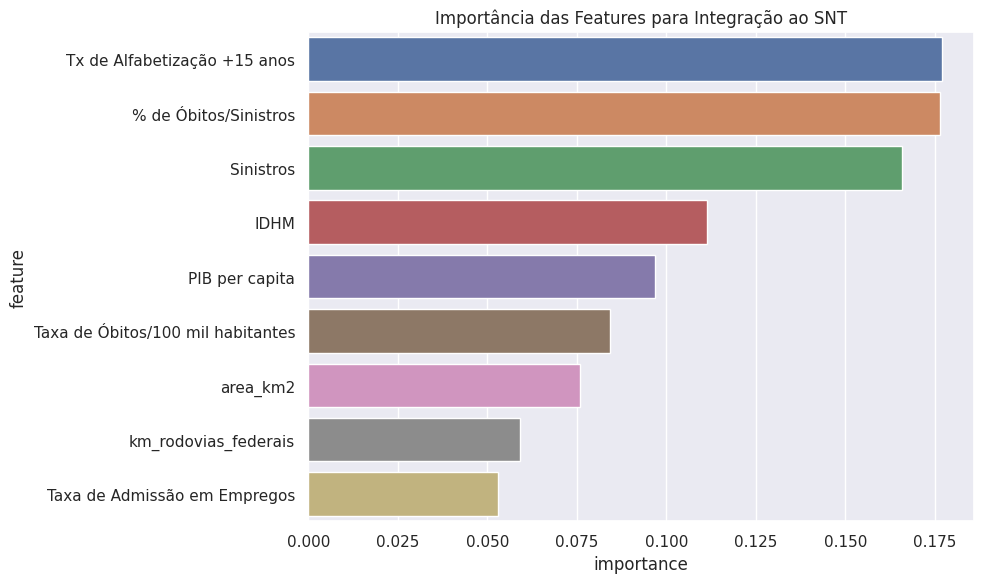


Import√¢ncia das Features (%):

                             feature  importance
2       Tx de Alfabetiza√ß√£o +15 anos       17.71
6              % de √ìbitos/Sinistros       17.65
0                          Sinistros       16.59
4                               IDHM       11.13
1                     PIB per capita        9.69
5  Taxa de √ìbitos/100 mil habitantes        8.43
7                           area_km2        7.60
8               km_rodovias_federais        5.90
3       Taxa de Admiss√£o em Empregos        5.30


In [44]:
# Import√¢ncia das features
feature_importance = pd.DataFrame({
    'feature': features,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importance)
plt.title('Import√¢ncia das Features para Integra√ß√£o ao SNT')
plt.tight_layout()
plt.show()

print("\nImport√¢ncia das Features (%):\n")
print(feature_importance.assign(importance=lambda x: x['importance']*100).round(2))

## 7. Matriz de Correla√ß√£o

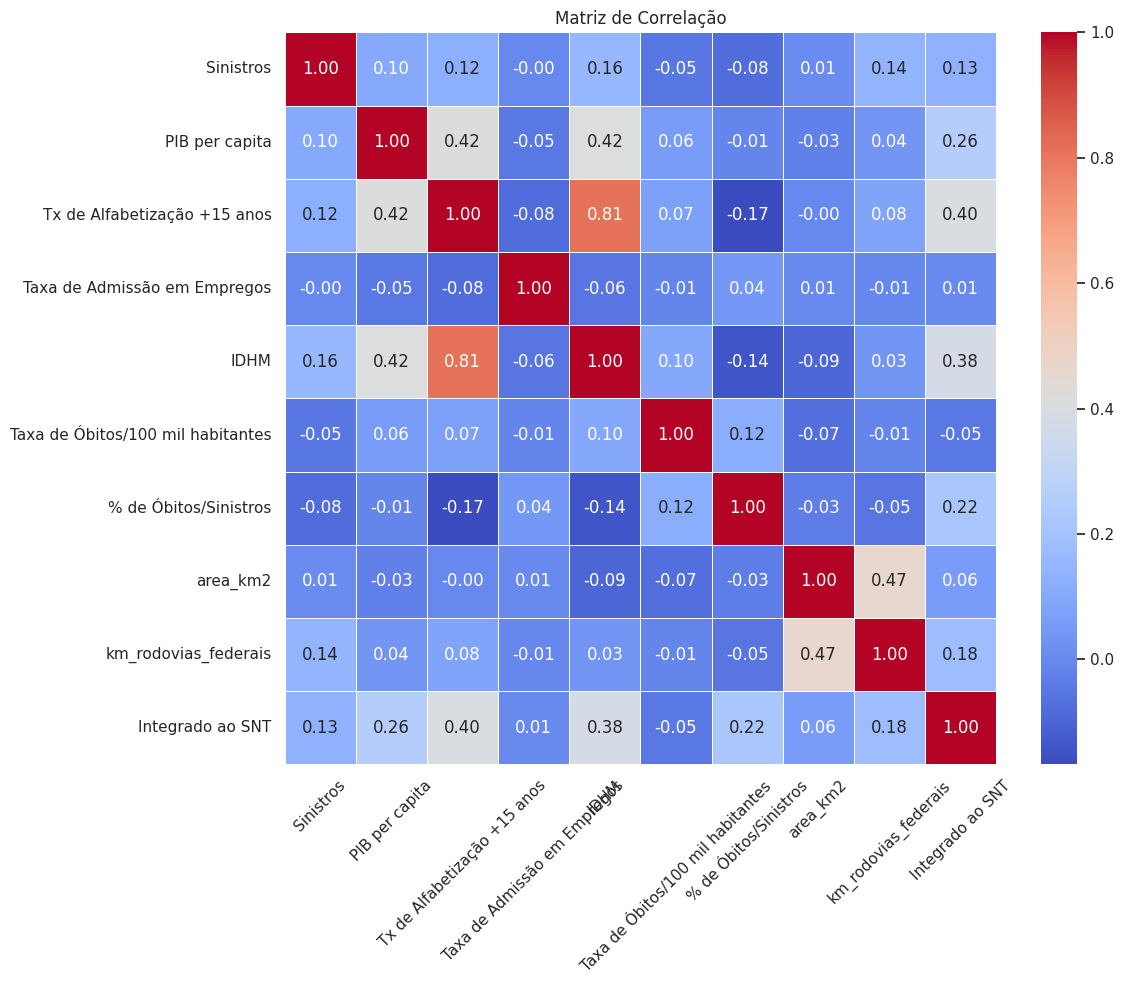

In [45]:
# Matriz de correla√ß√£o
plt.figure(figsize=(12, 10))
correlation_matrix = df[features + ['Integrado ao SNT']].copy()
correlation_matrix['Integrado ao SNT'] = y

corr = correlation_matrix.corr()

sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Matriz de Correla√ß√£o')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## 8. Matriz de Confus√£o

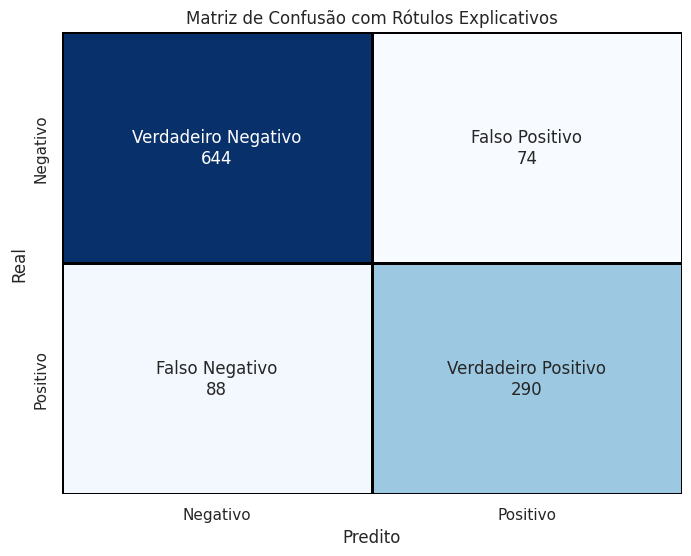

In [46]:
# Matriz de confus√£o
cm = confusion_matrix(y_test, y_pred)

labels = [
    ["Verdadeiro Negativo", "Falso Positivo"],
    ["Falso Negativo", "Verdadeiro Positivo"]
]

annot = [[f"{label}\n{cm[i][j]}" for j, label in enumerate(row)] for i, row in enumerate(labels)]

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=annot, fmt='', cmap='Blues', cbar=False, linewidths=1, linecolor='black')
plt.title('Matriz de Confus√£o com R√≥tulos Explicativos')
plt.xlabel('Predito')
plt.ylabel('Real')
plt.xticks(ticks=[0.5, 1.5], labels=['Negativo', 'Positivo'])
plt.yticks(ticks=[0.5, 1.5], labels=['Negativo', 'Positivo'])
plt.show()

## 9. Compara√ß√£o com Outros Modelos

In [47]:
# Regress√£o Log√≠stica
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=1000)
model.fit(X_train_resampled, y_train_resampled)
y_pred = model.predict(X_test_scaled)
print("Regress√£o Log√≠stica:")
print(classification_report(y_test, y_pred))


Regress√£o Log√≠stica:
              precision    recall  f1-score   support

           0       0.84      0.84      0.84       718
           1       0.70      0.69      0.69       378

    accuracy                           0.79      1096
   macro avg       0.77      0.77      0.77      1096
weighted avg       0.79      0.79      0.79      1096



In [48]:
# Naive Bayes
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train_resampled, y_train_resampled)
y_pred = model.predict(X_test_scaled)
print("\nNaive Bayes:")
print(classification_report(y_test, y_pred))


Naive Bayes:
              precision    recall  f1-score   support

           0       0.78      0.94      0.85       718
           1       0.81      0.50      0.62       378

    accuracy                           0.79      1096
   macro avg       0.80      0.72      0.74      1096
weighted avg       0.79      0.79      0.77      1096



In [49]:
# XGBoost
from xgboost import XGBClassifier
model = XGBClassifier(n_estimators=300, learning_rate=0.05, random_state=42)
model.fit(X_train_resampled, y_train_resampled)
y_pred = model.predict(X_test_scaled)
print("\nXGBoost:")
print(classification_report(y_test, y_pred))


XGBoost:
              precision    recall  f1-score   support

           0       0.90      0.90      0.90       718
           1       0.80      0.81      0.80       378

    accuracy                           0.86      1096
   macro avg       0.85      0.85      0.85      1096
weighted avg       0.87      0.86      0.87      1096



## 10. An√°lise para Munic√≠pios com Popula√ß√£o > 20.000 habitantes


Relat√≥rio de Classifica√ß√£o ‚Äî Popula√ß√£o > 20 mil:
              precision    recall  f1-score   support

         N√£o       0.66      0.70      0.68       124
         Sim       0.82      0.80      0.81       216

    accuracy                           0.76       340
   macro avg       0.74      0.75      0.75       340
weighted avg       0.77      0.76      0.76       340



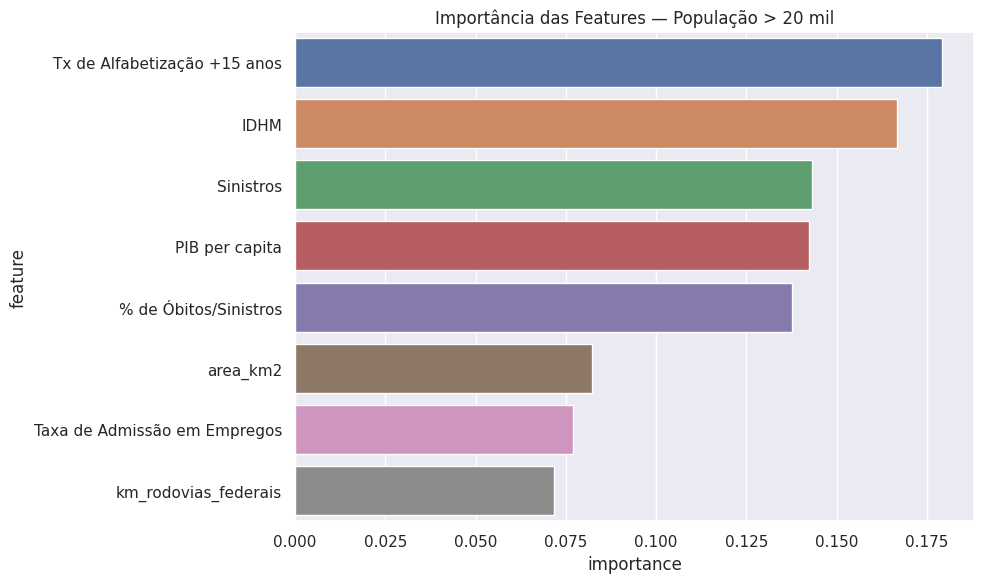

In [51]:
# Filtrar munic√≠pios
df_acima_100k = df[df['Popula√ß√£o'] > 20000]

# Prepara√ß√£o dos dados
X = df_acima_100k[features2]
y = df_acima_100k['Integrado ao SNT']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Pr√©-processamento
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)
X_train_scaled = scaler.fit_transform(X_train_imputed)
X_test_scaled = scaler.transform(X_test_imputed)

# SMOTE
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)

# Modelo
rf_model = RandomForestClassifier(n_estimators=200, random_state=42)
rf_model.fit(X_train_resampled, y_train_resampled)

# Avalia√ß√£o
y_pred = rf_model.predict(X_test_scaled)
print("\nRelat√≥rio de Classifica√ß√£o ‚Äî Popula√ß√£o > 20 mil:")
print(classification_report(y_test, y_pred))

# Import√¢ncia das features
feature_importance = pd.DataFrame({
    'feature': features2,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importance)
plt.title('Import√¢ncia das Features ‚Äî Popula√ß√£o > 20 mil')
plt.tight_layout()
plt.show()

## 11. An√°lise para Munic√≠pios com Popula√ß√£o <> 20.000 habitantes


Relat√≥rio de Classifica√ß√£o ‚Äî Popula√ß√£o < 20 mil:
              precision    recall  f1-score   support

         N√£o       0.92      0.91      0.92       622
         Sim       0.62      0.65      0.63       134

    accuracy                           0.87       756
   macro avg       0.77      0.78      0.78       756
weighted avg       0.87      0.87      0.87       756



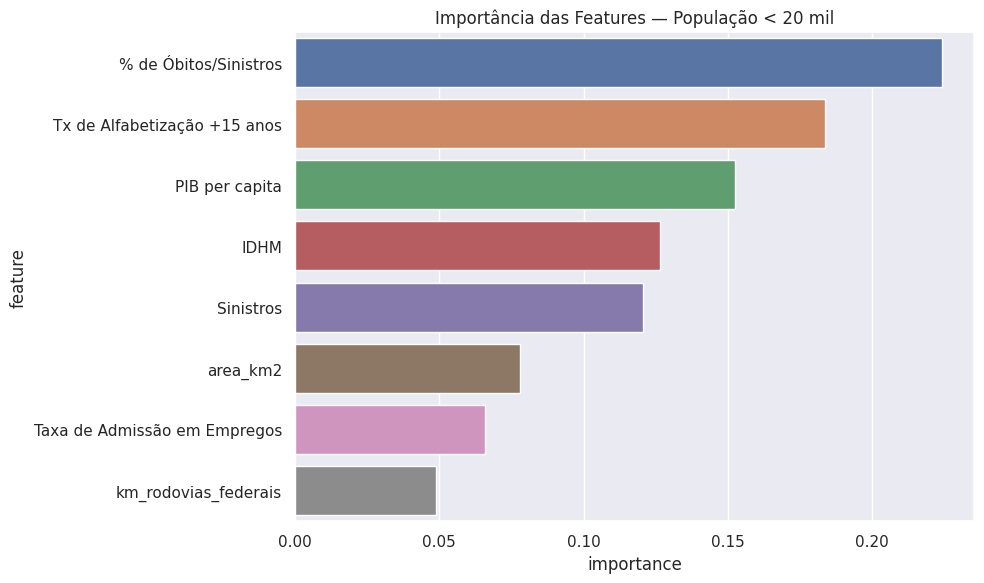

In [52]:
# Filtrar munic√≠pios
df_acima_100k = df[df['Popula√ß√£o'] < 20000]

# Prepara√ß√£o dos dados
X = df_acima_100k[features2]
y = df_acima_100k['Integrado ao SNT']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Pr√©-processamento
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)
X_train_scaled = scaler.fit_transform(X_train_imputed)
X_test_scaled = scaler.transform(X_test_imputed)

# SMOTE
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)

# Modelo
rf_model = RandomForestClassifier(n_estimators=200, random_state=42)
rf_model.fit(X_train_resampled, y_train_resampled)

# Avalia√ß√£o
y_pred = rf_model.predict(X_test_scaled)
print("\nRelat√≥rio de Classifica√ß√£o ‚Äî Popula√ß√£o < 20 mil:")
print(classification_report(y_test, y_pred))

# Import√¢ncia das features
feature_importance = pd.DataFrame({
    'feature': features2,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importance)
plt.title('Import√¢ncia das Features ‚Äî Popula√ß√£o < 20 mil')
plt.tight_layout()
plt.show()

# 12. An√°llise 


In [ ]:
# Fun√ß√£o de classifica√ß√£o
def classificar_pib_per_capita(valor):
    if valor >= 15_000:
        return "Desenvolvimento m√©dio-baixo"
    else:
        return "Muito baixo desenvolvimento"

# Aplicar classifica√ß√£o no DataFrame
df['Faixa PIB per capita'] = df['PIB per capita'].apply(classificar_pib_per_capita)

# Fun√ß√£o de classifica√ß√£o
def classificar_pib_per_capita(valor):
    if valor >= 100_000:
        return "Alt√≠ssimo desenvolvimento"
    elif valor >= 60_000:
        return "Alto desenvolvimento"
    elif valor >= 15_000:
        return "Desenvolvimento Baixo-intermedi√°rio"
    else:
        return "Muito baixo desenvolvimento"



üî∏ Relat√≥rio ‚Äî Desenvolvimento m√©dio-baixo:
              precision    recall  f1-score   support

         N√£o       0.68      0.84      0.75        92
         Sim       0.89      0.78      0.83       161

    accuracy                           0.80       253
   macro avg       0.79      0.81      0.79       253
weighted avg       0.82      0.80      0.80       253



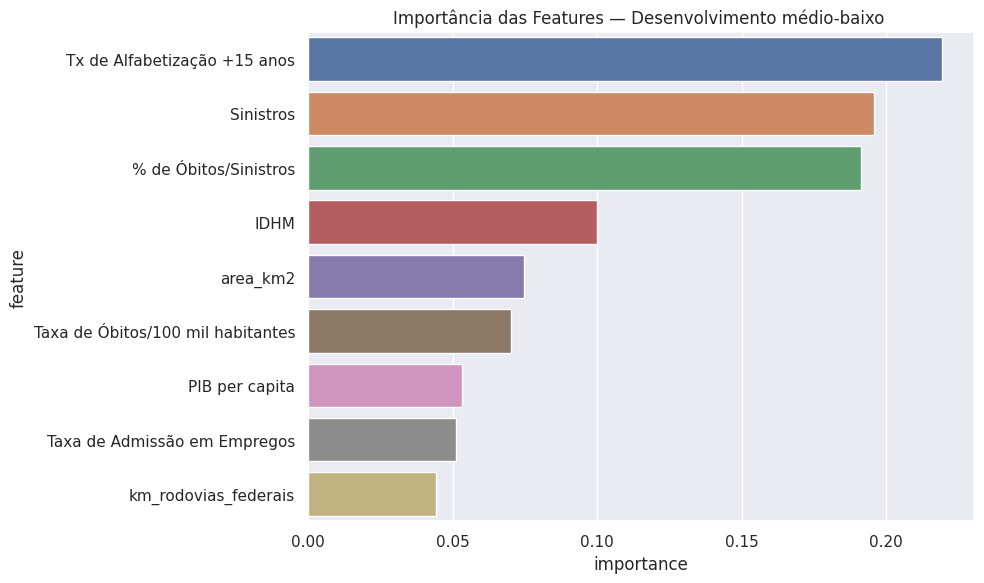

In [64]:
# Filtro: Desenvolvimento m√©dio-baixo 
df_medio_baixo = df[(df['PIB per capita'] >= 15000) & (df['PIB per capita'] < 60000)]


# Separa√ß√£o de features e target
X = df_medio_baixo[features]
y = df_medio_baixo['Integrado ao SNT']

# Treino/teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Pr√©-processamento
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)
X_train_scaled = scaler.fit_transform(X_train_imputed)
X_test_scaled = scaler.transform(X_test_imputed)

# SMOTE
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)

# Modelo
rf_model = RandomForestClassifier(n_estimators=200, random_state=42)
rf_model.fit(X_train_resampled, y_train_resampled)

# Avalia√ß√£o
y_pred = rf_model.predict(X_test_scaled)
print("\nüî∏ Relat√≥rio ‚Äî Desenvolvimento m√©dio-baixo:")
print(classification_report(y_test, y_pred))

# Import√¢ncia das features
feature_importance = pd.DataFrame({
    'feature': features,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importance)
plt.title('Import√¢ncia das Features ‚Äî Desenvolvimento m√©dio-baixo ')
plt.tight_layout()
plt.show()


üî∏ Relat√≥rio ‚Äî Muito baixo desenvolvimento:
              precision    recall  f1-score   support

         N√£o       0.91      0.91      0.91       626
         Sim       0.72      0.72      0.72       208

    accuracy                           0.86       834
   macro avg       0.81      0.81      0.81       834
weighted avg       0.86      0.86      0.86       834



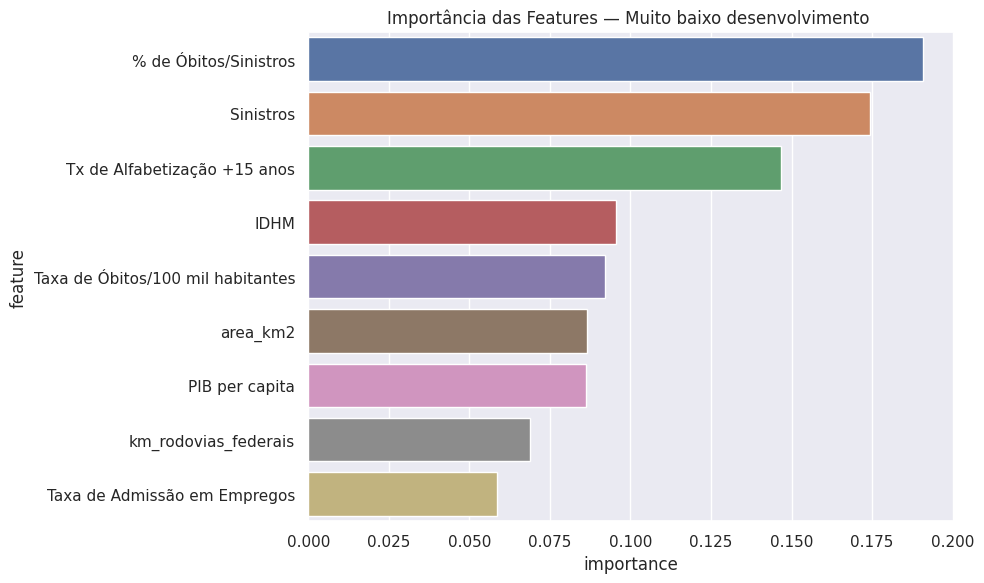

In [65]:
# Filtro: Desenvolvimento Muito baixo desenvolvimento 
df_muito_baixo_desenvolvimento = df[df['PIB per capita'] < 15000]


# Separa√ß√£o de features e target
X = df_muito_baixo_desenvolvimento[features]
y = df_muito_baixo_desenvolvimento['Integrado ao SNT']

# Treino/teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Pr√©-processamento
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)
X_train_scaled = scaler.fit_transform(X_train_imputed)
X_test_scaled = scaler.transform(X_test_imputed)

# SMOTE
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)

# Modelo
rf_model = RandomForestClassifier(n_estimators=200, random_state=42)
rf_model.fit(X_train_resampled, y_train_resampled)

# Avalia√ß√£o
y_pred = rf_model.predict(X_test_scaled)
print("\nüî∏ Relat√≥rio ‚Äî Muito baixo desenvolvimento:")
print(classification_report(y_test, y_pred))

# Import√¢ncia das features
feature_importance = pd.DataFrame({
    'feature': features,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importance)
plt.title('Import√¢ncia das Features ‚Äî Muito baixo desenvolvimento ')
plt.tight_layout()
plt.show()